In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [8]:
# Load the dataset
data = pd.read_csv("/content/student_dropout.csv")

# Display the first few rows and summary information to understand its structure
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
# Summary information to understand its structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [12]:
# Handle object columns
data['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [14]:
# Label encode Target column
data['Target'] = data['Target'].map({
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [16]:
corr = data.corr()
# Get columns with correlation higher than or equal 0.1

target_corr = corr['Target']

high_corr = target_corr[target_corr.abs() >= 0.1]

high_corr

,Target
Application mode,-0.116928
Debtor,-0.154802
Tuition fees up to date,0.342121
Gender,-0.118454
Scholarship holder,0.114517
Age at enrollment,-0.201806
Curricular units 1st sem (evaluations),0.125278
Curricular units 1st sem (approved),0.290243
Curricular units 1st sem (grade),0.349652
Curricular units 2nd sem (evaluations),0.194412


In [17]:
# Filter the data with high correlations

data_filtered = data[high_corr.index]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4424 non-null   int64  
 1   Debtor                                  4424 non-null   int64  
 2   Tuition fees up to date                 4424 non-null   int64  
 3   Gender                                  4424 non-null   int64  
 4   Scholarship holder                      4424 non-null   int64  
 5   Age at enrollment                       4424 non-null   int64  
 6   Curricular units 1st sem (evaluations)  4424 non-null   int64  
 7   Curricular units 1st sem (approved)     4424 non-null   int64  
 8   Curricular units 1st sem (grade)        4424 non-null   float64
 9   Curricular units 2nd sem (evaluations)  4424 non-null   int64  
 10  Curricular units 2nd sem (approved)     4424 non-null   int6

In [18]:
# Check for null values

data_filtered.isnull().sum()

,0
Application mode,0
Debtor,0
Tuition fees up to date,0
Gender,0
Scholarship holder,0
Age at enrollment,0
Curricular units 1st sem (evaluations),0
Curricular units 1st sem (approved),0
Curricular units 1st sem (grade),0
Curricular units 2nd sem (evaluations),0


In [20]:
# Check for duplicates values

data_filtered.duplicated().sum()

147

In [21]:
# Remove duplicates

data_filtered = data_filtered.drop_duplicates()
data_filtered.duplicated().sum()

0

In [22]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application mode                        4277 non-null   int64  
 1   Debtor                                  4277 non-null   int64  
 2   Tuition fees up to date                 4277 non-null   int64  
 3   Gender                                  4277 non-null   int64  
 4   Scholarship holder                      4277 non-null   int64  
 5   Age at enrollment                       4277 non-null   int64  
 6   Curricular units 1st sem (evaluations)  4277 non-null   int64  
 7   Curricular units 1st sem (approved)     4277 non-null   int64  
 8   Curricular units 1st sem (grade)        4277 non-null   float64
 9   Curricular units 2nd sem (evaluations)  4277 non-null   int64  
 10  Curricular units 2nd sem (approved)     4277 non-null   int64  
 

In [23]:
# Split the data

X = data_filtered.drop(['Target'], axis=1)
Y = data_filtered.Target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('Train size:', len(x_train))
print('Test size:', len(x_test))

Train size: 3421
Test size: 856


In [24]:
# Scale the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**1- Logistic Regression**

In [25]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr_pred = lr.predict(x_test)

lr_accuracy = accuracy_score(lr_pred, y_test)
print('Logistic Regression Score:', lr_accuracy)

Logistic Regression Score: 0.7383177570093458


**2- SVM**

In [26]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

svm_pred = svm.predict(x_test)

svm_accuracy = accuracy_score(svm_pred, y_test)
print('SVM Score:', svm_accuracy)

SVM Score: 0.7441588785046729


**3- Random Forest**

In [28]:
randf = RandomForestClassifier(n_estimators=300)
randf.fit(x_train, y_train)

randf_pred = randf.predict(x_test)

randf_accuracy = accuracy_score(randf_pred, y_test)
print('Random Forest Score:', randf_accuracy)

Random Forest Score: 0.7336448598130841


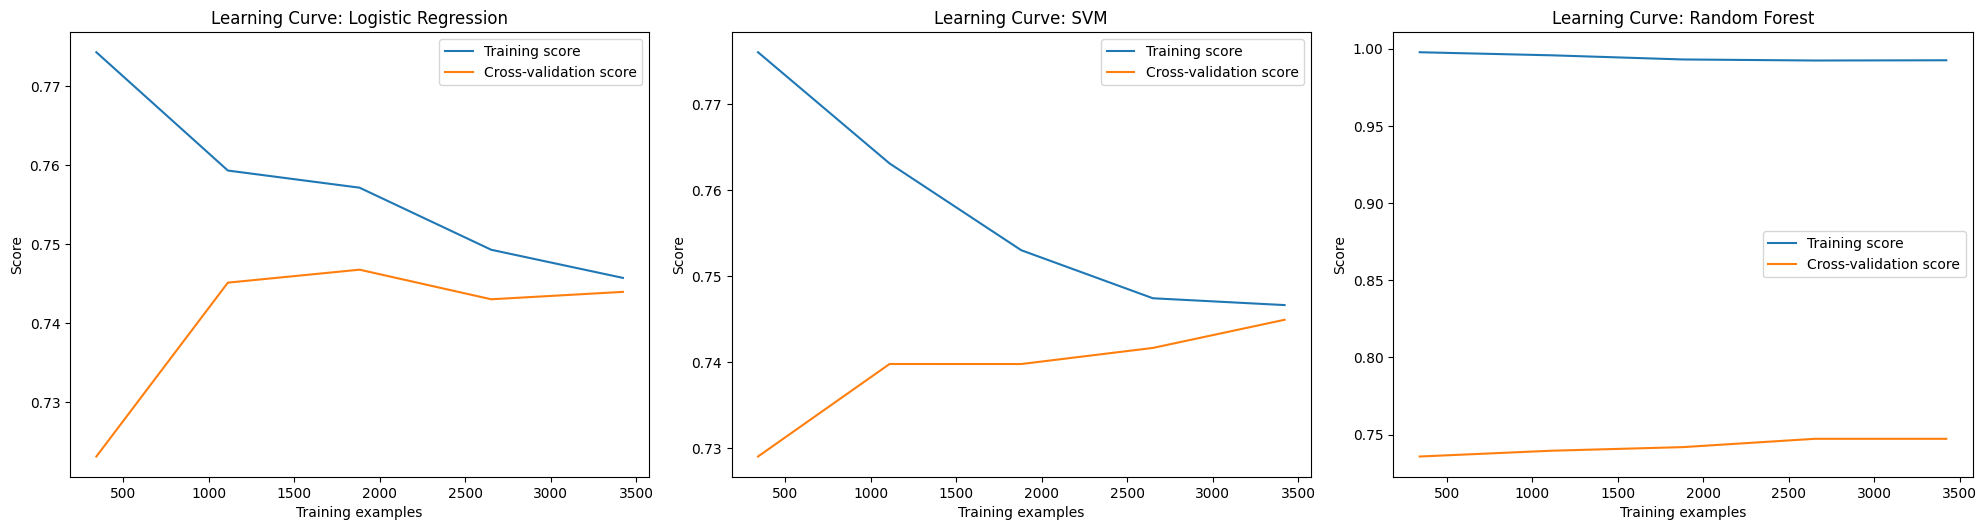

In [30]:
# Plot learning curves for each model

models = [lr, svm, randf]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, model in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, n_jobs=-1)

    axes[i].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
    axes[i].plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
    axes[i].set_xlabel('Training examples')
    axes[i].set_ylabel('Score')
    axes[i].set_title(f'Learning Curve: {model_names[i]}')
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

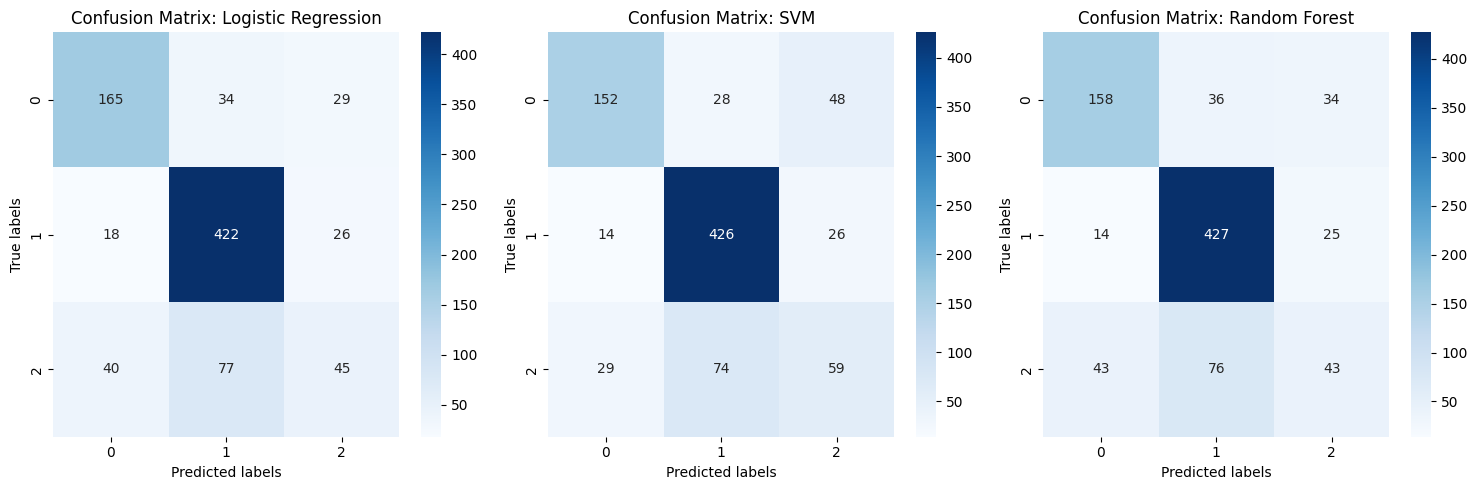

In [37]:
# Visualize Each Model's Confusion Matrix

# List of models and predictions
models = [lr, svm, randf]
predictions = [lr_pred, svm_pred, randf_pred]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Iterate through models and plot their confusion matrix
for i, (model, pred) in enumerate(zip(models, predictions)):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, ax=axes[i], fmt='g', cmap='Blues')
    axes[i].set_title(f'Confusion Matrix: {model_names[i]}')
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

# Adjust layout
plt.tight_layout()
plt.show()